<a href="https://colab.research.google.com/github/Adi77189/ML-Projects/blob/main/Fake_News_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake_News_prediction_Analysis

**Problem Description:Building a Fake News Prediction System using Machine Learning with Python. We will be using Logistic Regression model for prediction.**

In [57]:
# Importing Dependencies
import numpy as np
import pandas as pd
import re #library used for searching text in paragraph
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer # Converts Text-----> to features vector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [36]:
import nltk # natural language tool kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# a list of common stopwords in English
print(stopwords.words('english'))


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

DATA Preprocessing

In [38]:
new_data_set=pd.read_csv('/content/train.csv')

In [39]:
new_data_set.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


1.id:unique identifier for news article

2.title:Title of news article

3.author:Author of news article

4.text: description about news article

5.label:Target/label

      1----->Fake news

      0----->Real news

In [40]:
# calculating missing values
new_data_set.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [41]:
# dealing with missing data we will impute the data since it is text data we will impute it with empty string
new_data_set=new_data_set.fillna('')

In [42]:
new_data_set.shape

(20800, 5)

In [43]:
# merging two columns two create new column content----> title + author to predict label
new_data_set['content']=new_data_set['author']+' '+new_data_set['title']

In [46]:
#Separating labels and features
X=new_data_set.drop(columns=['label'],axis=1)
y=new_data_set['label']

In [48]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [27]:
print(y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


Stemming :- reducing words to their root world
example: running,runner,runs ---->root_word=run

In [49]:
port_stem=PorterStemmer()

In [50]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [51]:
new_data_set['content']=new_data_set['content'].apply(stemming)

In [53]:
print(new_data_set['content'])# it contain all root words as well as excluding all stopwords from paragraph

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [55]:
# creating features based of that stemed column
X=new_data_set['content'].values
y=new_data_set['label'].values

In [60]:
#Converting Text data to Feature vector or numbers
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(X)



In [63]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 3600)	0.3598939188262559
  (0, 8909)	0.3635963806326075
  (0, 7005)	0.21874169089359144
  (0, 3792)	0.2705332480845492
  (0, 267)	0.27010124977708766
  (0, 4973)	0.233316966909351
  (0, 13473)	0.2565896679337957
  (0, 2959)	0.2468450128533713
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 2483)	0.3676519686797209
  (0, 15686)	0.28485063562728646
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 2813)	0.19094574062359204
  (1, 1497)	0.2939891562094648
  (1, 16799)	0.30071745655510157
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (2, 3103)	0.46097489583229645
  (2, 2943)	0.3179886800654691
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  :	:
  (20797, 9588)	0.17455348025522197
  (20797, 7042)	0.21799048897828685
  (207

Training and Testing Data

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Model------>LogisticRegression

In [67]:
model=LogisticRegression()

In [68]:
model.fit(X_train,y_train)

LogisticRegression()

Evaluation

In [73]:
# on Training Data
preds_train=model.predict(X_train)

In [74]:
accuracy_score(y_train,preds_train)

0.9871995192307692

In [75]:
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8310
           1       0.98      0.99      0.99      8330

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



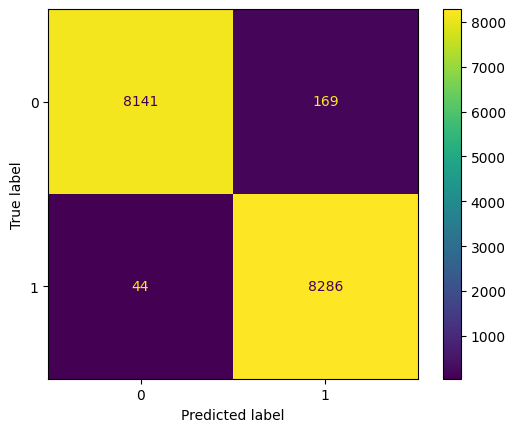

In [77]:
ConfusionMatrixDisplay.from_predictions(y_train,preds_train)

Model_prediction on unseen TestDataset

In [81]:
news_test=X_test[0]
preds=model.predict(news_test)
print(preds)
if preds==0:
  print('Real News')
else:
  print('Fake News')

[0]
Real News


In [82]:
print(y_test[0])

0


In [ ]:
# Here are model is performing correctly